In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import k_means, KMeans
from fcmeans import FCM


def hist_boxplot(label = pd.Series, nombre=str):

    fig, axs = plt.subplots(2, 1, figsize = (7, 9))

    axs[0].hist(label, bins = 200)
    axs[0].set_ylabel("Frecuencia")
    axs[0].axvline(label.mean(), color = "magenta", linestyle = "dashed", linewidth = 1.5)
    axs[0].axvline(label.median(), color = "cyan", linestyle = "dashed", linewidth = 1.5)

    axs[1].boxplot(label, vert = False)
    axs[1].set_xlabel("Magnitud")

    fig.suptitle(nombre)

In [2]:
Datos=pd.read_csv("Customer-Churn-Records.csv")
#Datos=pd.read_excel("base.xlsx")
Datos_Tabla=pd.DataFrame(Datos)
Datos_Tabla.dropna()
Datos_Tabla.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

In [3]:

#list_feutures = ['Number', 'Name', 'Symbol', 'Market Cap', 'Price', 'Circulating Supply','Volume (24hr)', ' 1h', ' 24h', ' 7d']
list_feutures = ['CreditScore',"Gender","Age","Tenure","Balance","EstimatedSalary","Complain"]
utiles=Datos_Tabla[list_feutures]

utiles["Gender"]=utiles["Gender"].replace("Female",0)
utiles["Gender"]=utiles["Gender"].replace("Male",1)
Datos_Tabla["Gender"]=Datos_Tabla["Gender"].replace("Female",0)
Datos_Tabla["Gender"]=Datos_Tabla["Gender"].replace("Male",1)
utiles
#Datos_Tabla.keys()

C:\Users\ACER\AppData\Local\Temp/ipykernel_8088/480223874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utiles["Gender"]=utiles["Gender"].replace("Female",0)
C:\Users\ACER\AppData\Local\Temp/ipykernel_8088/480223874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utiles["Gender"]=utiles["Gender"].replace("Male",1)


CreditScore  Gender  Age  Tenure    Balance  EstimatedSalary  Complain
0             619       0   42       2       0.00        101348.88         1
1             608       0   41       1   83807.86        112542.58         1
2             502       0   42       8  159660.80        113931.57         1
3             699       0   39       1       0.00         93826.63         0
4             850       0   43       2  125510.82         79084.10         0
...           ...     ...  ...     ...        ...              ...       ...
9995          771       1   39       5       0.00         96270.64         0
9996          516       1   35      10   57369.61        101699.77         0
9997          709       0   36       7       0.00         42085.58         1
9998          772       1   42       3   75075.31         92888.52         1
9999          792       0   28       4  130142.79         38190.78         0

[10000 rows x 7 columns]

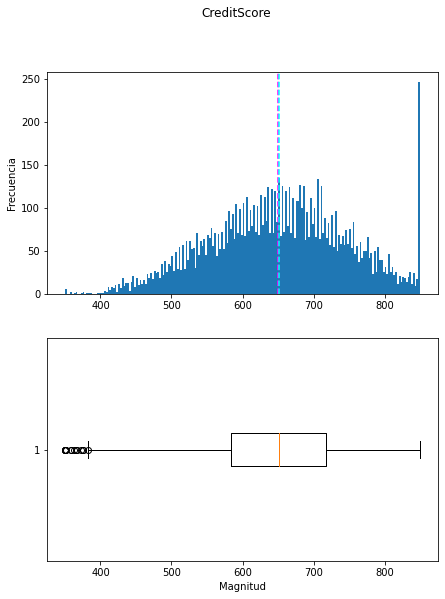

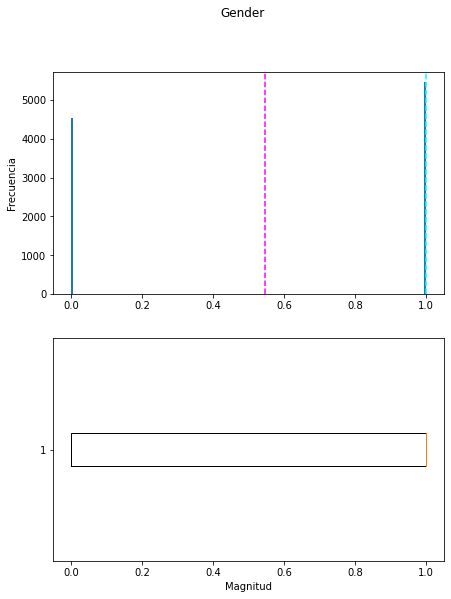

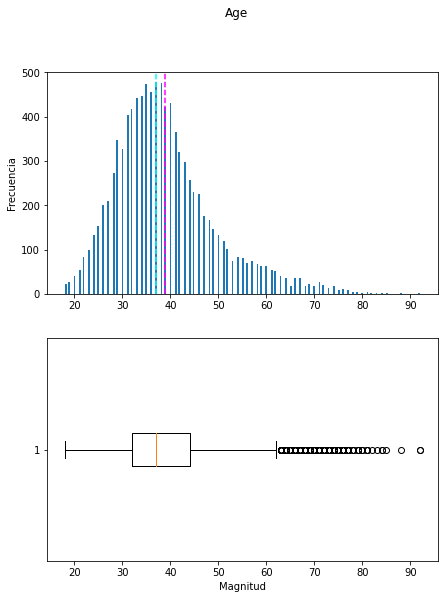

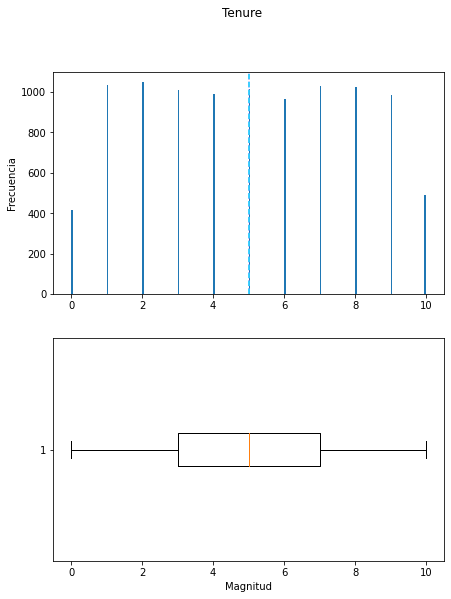

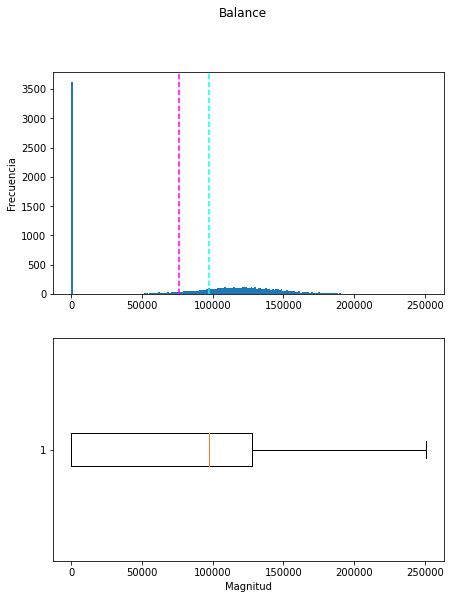

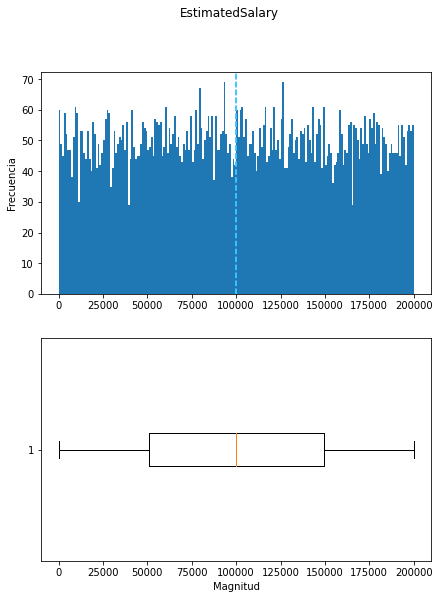

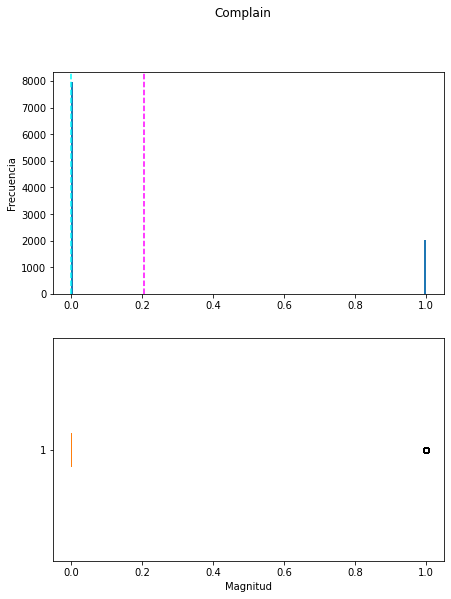

In [5]:


for feature in list_feutures:
    
    hist_boxplot(label = utiles[feature],nombre=feature)
    

In [6]:
#filtrado=Datos_Tabla[(Datos_Tabla[" 24h"]<300) &(Datos_Tabla["Circulating Supply"]<5*(10**9)) & (Datos_Tabla["Volume (24hr)"]<1*(10**9))]
#list_feutures = ['Circulating Supply',"Volume (24hr)"," 24h"]
#for feature in list_feutures:
    
#    hist_boxplot(label = filtrado[feature],nombre=feature)

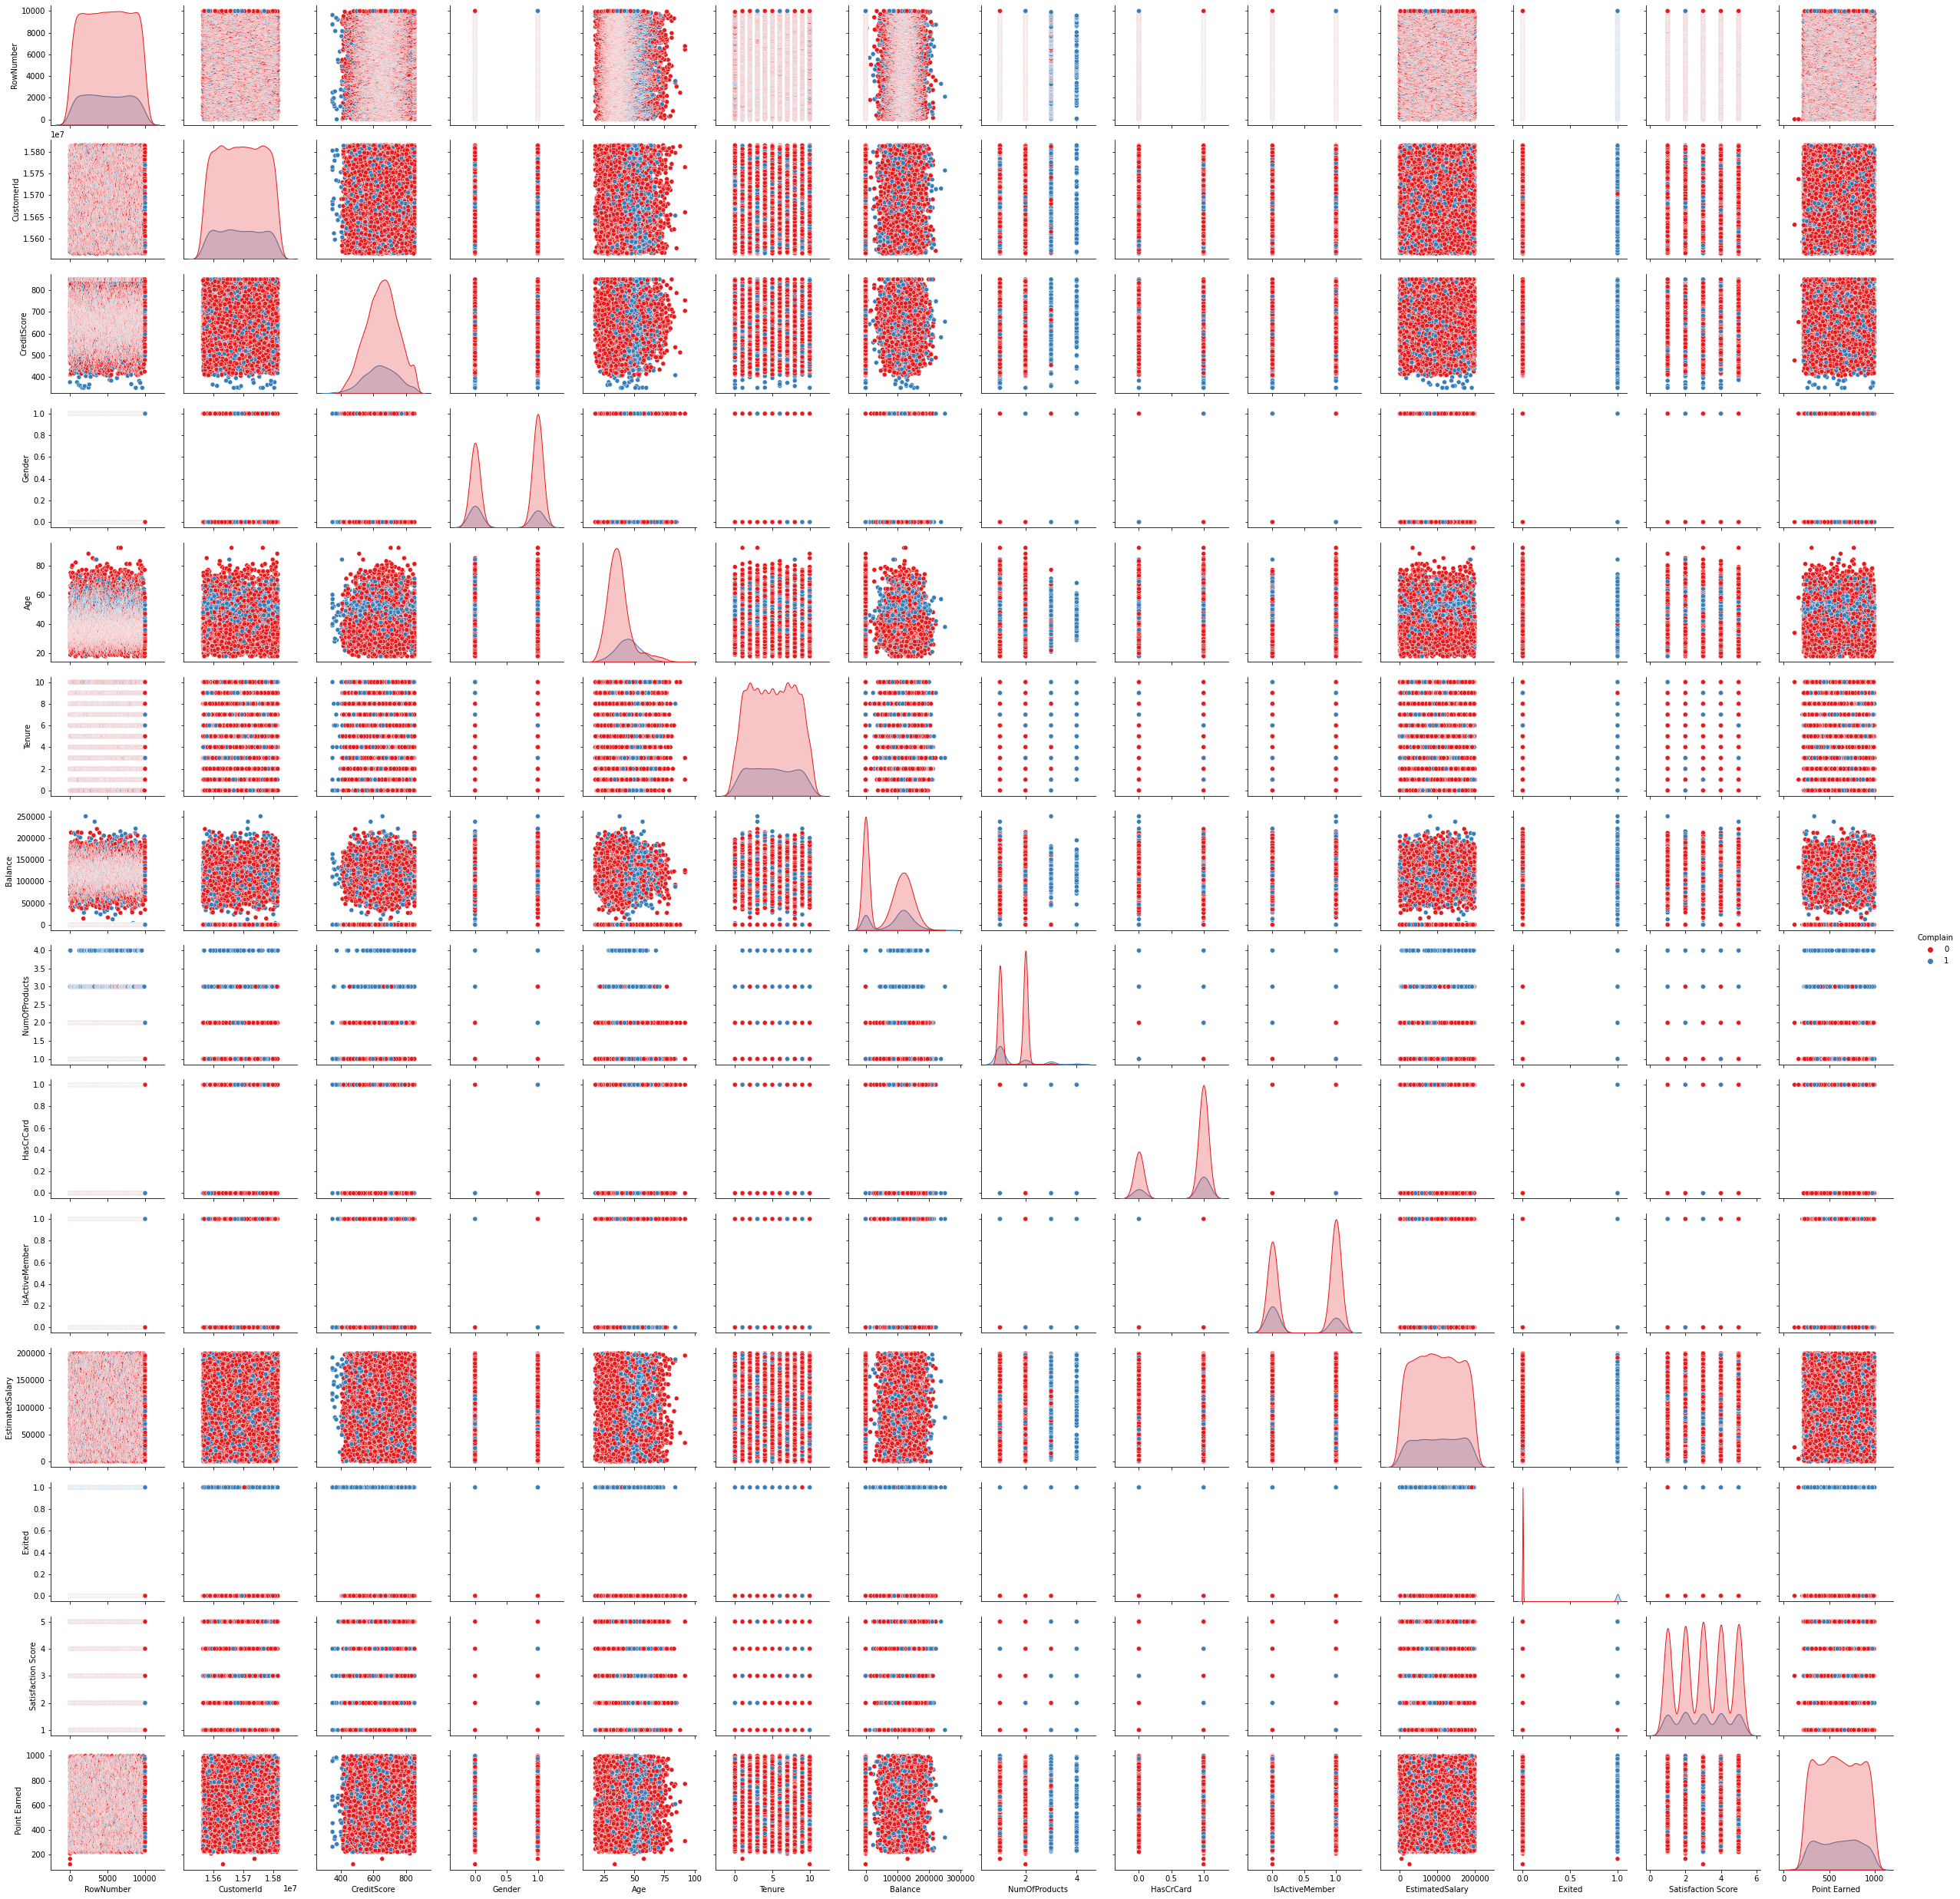

In [7]:
sns.pairplot(Datos_Tabla, hue = "Complain", palette = "Set1")

<AxesSubplot:>

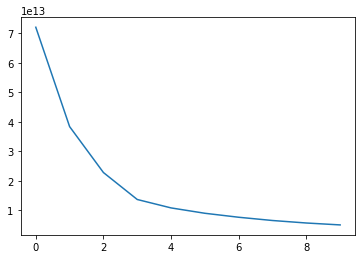

In [4]:
list_feutures = ['CreditScore',"Balance","EstimatedSalary"]
elegidos=Datos_Tabla[list_feutures]
fuzzy_data=elegidos.copy()
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, max_iter=500)
    kmeans.fit(elegidos)
    wcss.append(kmeans.inertia_)

sns.lineplot(data=wcss)


In [5]:
clusters=KMeans(n_clusters=3, max_iter=500)
clusters.fit(elegidos)


KMeans(max_iter=500, n_clusters=3)

In [6]:
elegidos["clusters"]=clusters.labels_
elegidos.head(5)

C:\Users\ACER\AppData\Local\Temp/ipykernel_8088/1880753903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elegidos["clusters"]=clusters.labels_


CreditScore    Balance  EstimatedSalary  clusters
0          619       0.00        101348.88         0
1          608   83807.86        112542.58         1
2          502  159660.80        113931.57         1
3          699       0.00         93826.63         0
4          850  125510.82         79084.10         2

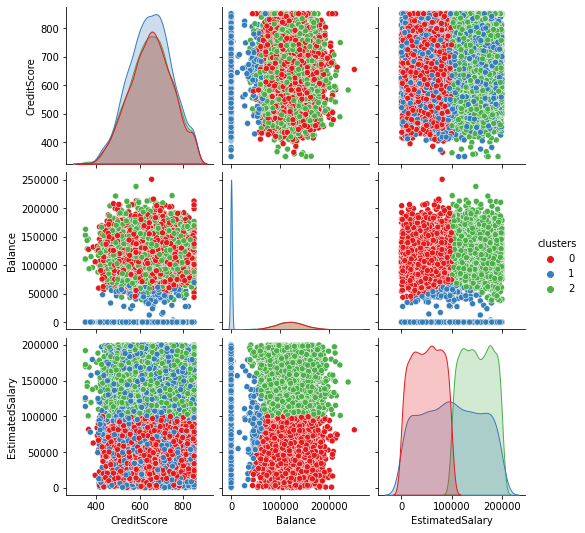

In [11]:
sns.pairplot(elegidos, hue = "clusters", palette = "Set1")


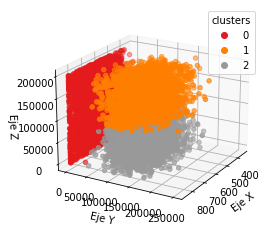

In [7]:
df=elegidos

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df["CreditScore"], df["Balance"], df["EstimatedSalary"], c=df["clusters"].astype('category').cat.codes, cmap='Set1')

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
handles, labels = scatter.legend_elements()
ax.legend(handles, df["clusters"].unique(), title='clusters')
ax.view_init(elev=20, azim=30)

plt.show()

### FUZZY C MEANS


In [8]:
s=fuzzy_data.to_numpy()
Fuzzy=FCM(n_clusters=3)
Fuzzy.fit(s)

fuzzyC=Fuzzy.centers
fuzzy_data1=fuzzy_data.copy()
fuzzy_data2=fuzzy_data.copy()

fuzzy_lables1=Fuzzy.u.argmax(axis=1)
fuzzy_lables2=Fuzzy.u.argmin(axis=1)
fuzzy_data1["clusters"]=fuzzy_lables1
fuzzy_data2["clusters"]=fuzzy_lables2
fuzzy_data1

CreditScore    Balance  EstimatedSalary  clusters
0             619       0.00        101348.88         0
1             608   83807.86        112542.58         1
2             502  159660.80        113931.57         1
3             699       0.00         93826.63         2
4             850  125510.82         79084.10         1
...           ...        ...              ...       ...
9995          771       0.00         96270.64         2
9996          516   57369.61        101699.77         0
9997          709       0.00         42085.58         2
9998          772   75075.31         92888.52         1
9999          792  130142.79         38190.78         1

[10000 rows x 4 columns]

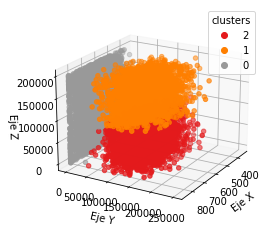

In [14]:
df=fuzzy_data1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#f,axes=plt.subplots(1,2,figsize=(20,10))
scatter = ax.scatter(df["CreditScore"], df["Balance"], df["EstimatedSalary"], c=df["clusters"].astype('category').cat.codes, cmap='Set1')
#scatter = ax.scatter(df["CreditScore"], df["Balance"], df["EstimatedSalary"], c=df["clusters"].astype('category').cat.codes, cmap='Set1',axis=axes[1])
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
handles, labels = scatter.legend_elements()
ax.legend(handles, df["clusters"].unique(), title='clusters')
ax.view_init(elev=20, azim=30)

plt.show()

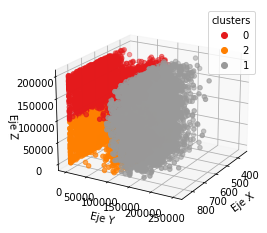

In [15]:
df=fuzzy_data2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#f,axes=plt.subplots(1,2,figsize=(20,10))
scatter = ax.scatter(df["CreditScore"], df["Balance"], df["EstimatedSalary"], c=df["clusters"].astype('category').cat.codes, cmap='Set1')
#scatter = ax.scatter(df["CreditScore"], df["Balance"], df["EstimatedSalary"], c=df["clusters"].astype('category').cat.codes, cmap='Set1',axis=axes[1])
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
handles, labels = scatter.legend_elements()
ax.legend(handles, df["clusters"].unique(), title='clusters')
ax.view_init(elev=20, azim=30)
plt.show()

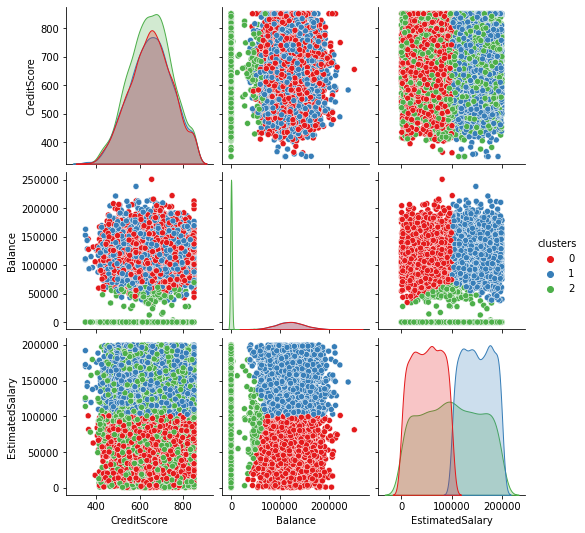

In [38]:
sns.pairplot(fuzzy_data1, hue = "clusters", palette = "Set1")

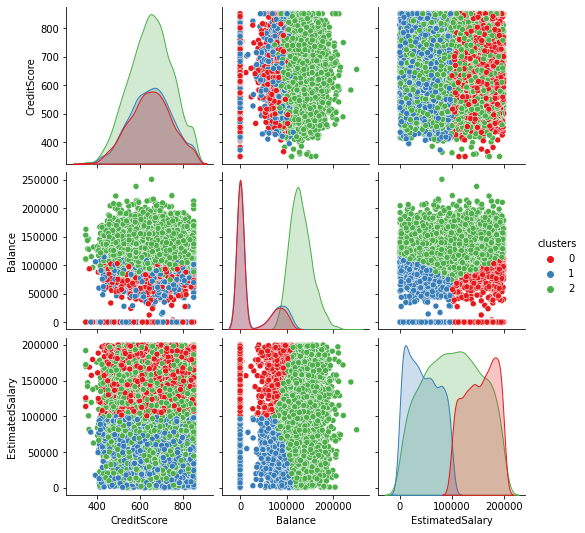

In [39]:
sns.pairplot(fuzzy_data2, hue = "clusters", palette = "Set1")

In [11]:
Fuzzy.u

array([[0.47713284, 0.08660424, 0.43626292],
       [0.22308265, 0.62529794, 0.15161941],
       [0.04992647, 0.90660854, 0.04346498],
       ...,
       [0.02556011, 0.01623005, 0.95820985],
       [0.21601915, 0.51238129, 0.27159955],
       [0.10418598, 0.68651992, 0.2092941 ]])

In [61]:
import skfuzzy as fuzz

cntr, u, u0, d, jm, p, fpc=fuzz.cmeans(fuzzy_data,3,2,0.01,200)

print(cntr)
labels = np.argmax(u, axis=0)
print(labels)
u

[[1.01348880e+05 1.12542580e+05 1.13931570e+05 ... 4.20855800e+04
  9.28885200e+04 3.81907800e+04]
 [6.19000000e+02 6.08000000e+02 5.02000000e+02 ... 7.09000000e+02
  7.72000000e+02 7.92000000e+02]
 [2.18861331e-07 8.38078600e+04 1.59660800e+05 ... 9.09179021e-08
  7.50753100e+04 1.30142790e+05]]
[1 2 0]


array([[1.39573777e-24, 4.75785594e-24, 1.00000000e+00],
       [1.00000000e+00, 3.78177202e-24, 6.73186597e-25],
       [1.90972224e-24, 1.00000000e+00, 1.15882480e-24]])

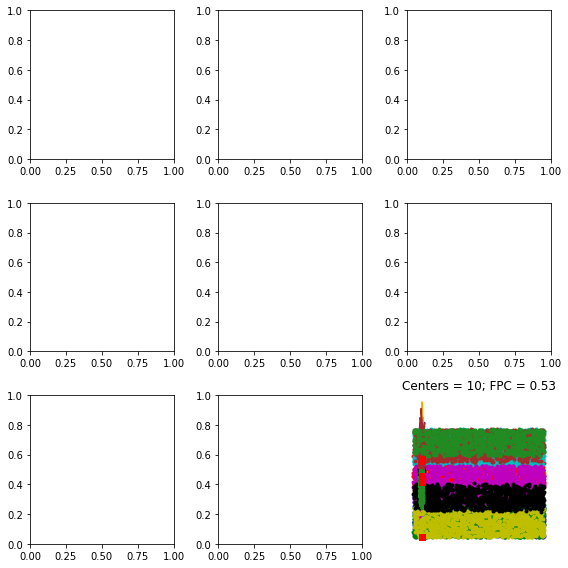

In [62]:
xpts=fuzzy_data["CreditScore"]
ypts=fuzzy_data["Balance"]
zpts=fuzzy_data["EstimatedSalary"]

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((fuzzy_data["CreditScore"], fuzzy_data["Balance"],fuzzy_data["EstimatedSalary"]))
fpcs = []
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

fpcs.append(fpc)

# Plot assigned clusters, for each data point in training set
cluster_membership = np.argmax(u, axis=0)
for j in range(ncenters):
    ax.plot(xpts[cluster_membership == j],
            ypts[cluster_membership == j],
            zpts[cluster_membership==j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
ax.axis('off')

fig1.tight_layout()